# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasnainraza/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
!pip install newsapi-python

In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("API_KEY")

In [4]:
from newsapi import NewsApiClient

# Create a newsapi client
newsapi = NewsApiClient(api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_art = newsapi.get_everything(q='bitcoin', language="en")

In [6]:
# Fetch the Ethereum news articles
ethereum_art = newsapi.get_everything(q='ethereum', language="en")

In [7]:
def vader_sentiment(df, column): 
    # Create vader Sentiment analyzer
    vader = SentimentIntensityAnalyzer()
    # Lambda function to run vader sentiment on title column
    comp = lambda title: vader.polarity_scores(title)['compound']
    neg = lambda title: vader.polarity_scores(title)['neg']
    neu = lambda title: vader.polarity_scores(title)['neu']
    pos = lambda title: vader.polarity_scores(title)['pos']
    # Apply sentiment to title column and put values in a new column named title_sentiment
    df['neg'] = df[column].apply(neg)
    df['neu'] = df[column].apply(neu)
    df['pos'] = df[column].apply(pos)
    df['compound'] = df[column].apply(comp)
    return df

In [8]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = pd.DataFrame.from_dict(bitcoin_art['articles'])
btc_df.drop(['source', 'url', 'urlToImage', 'publishedAt', 'description', 'content'], axis=1, inplace=True)
btc_df = vader_sentiment(btc_df, 'title')

In [9]:
# Create the Ethereum sentiment scores DataFrame
eth_df = pd.DataFrame.from_dict(ethereum_art['articles'])
eth_df.drop(['source', 'url', 'urlToImage', 'publishedAt', 'description', 'content'], axis=1, inplace=True)
eth_df = vader_sentiment(eth_df, 'title')

In [10]:
btc_df.columns

Index(['author', 'title', 'neg', 'neu', 'pos', 'compound'], dtype='object')

In [11]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,neg,neu,pos,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.111530,0.818210,0.070250,-0.089301
std,0.155477,0.161757,0.106231,0.399074
min,0.000000,0.284000,0.000000,-0.910000
25%,0.000000,0.722250,0.000000,-0.366350
50%,0.000000,0.813000,0.000000,0.000000
75%,0.212250,1.000000,0.122500,0.177900
max,0.716000,1.000000,0.492000,0.771700


In [12]:
# Describe the Ethereum Sentiment
eth_df.describe()

,neg,neu,pos,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.080740,0.845210,0.074050,-0.005387
std,0.145707,0.166089,0.120688,0.349732
min,0.000000,0.400000,0.000000,-0.862500
25%,0.000000,0.730500,0.000000,-0.153100
50%,0.000000,0.855500,0.000000,0.000000
75%,0.128500,1.000000,0.124000,0.090925
max,0.600000,1.000000,0.452000,0.807400


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('omw-1.4')
from string import punctuation
import re

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hasnainraza/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw+=["ain't",'said','say','week','char','ha']

In [15]:
# Complete the tokenizer function
def tokenizer(df, column):
    """Tokenizes text."""
    tokens = []
    for text in list(df[column]):
        # Remove the punctuation from text
        text = re.sub(r'[^\w\s]','',text)

        # Create a tokenized list of the words
        tkn = word_tokenize(text)

        # Lemmatize words into root words
        # Convert the words to lowercase
        # Remove the stop words
        tkn = [lemmatizer.lemmatize(word).lower() for word in tkn if word not in sw]
        tokens.append(tkn)
    
    return tokens

In [16]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = tokenizer(btc_df, 'title')

In [17]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = tokenizer(eth_df, 'title')

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
def generate_Ngram(df,N):
    doc=' '.join(df['title'])
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ngrams(output, n=N)

In [20]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams = generate_Ngram(btc_df, 2)

In [21]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = generate_Ngram(eth_df, 2)

In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
btc_top10 = token_count(btc_ngrams, 10)
btc_top10

[(('three', 'arrows'), 5),
 (('arrows', 'capital'), 5),
 (('bitcoin', 'etf'), 4),
 (('crypto', 'crash'), 4),
 (('elon', 'musk'), 3),
 (('spot', 'bitcoin'), 3),
 (('bitcoin', 'miner'), 3),
 (('crypto', 'market'), 3),
 (('digital', 'asset'), 3),
 (('fund', 'three'), 3)]

In [24]:
# Use token_count to get the top 10 words for Ethereum
eth_top10 = token_count(eth_ngrams, 10)
eth_top10

[(('nft', 'marketplace'), 7),
 (('bitcoin', 'ethereum'), 7),
 (('buy', 'ethereum'), 6),
 (('ethereum', 'dogecoin'), 4),
 (('axie', 'infinity'), 3),
 (('digital', 'asset'), 3),
 (('ethereum', 'bitcoin'), 3),
 (('job', 'offer'), 2),
 (('ahead', 'merge'), 2),
 (('merge', 'ethereum'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [26]:
def generate_wc(df):
    doc=' '.join(df['title'])
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    input_text=' '.join(output)
    wc = WordCloud().generate(input_text)
    plt.imshow(wc)

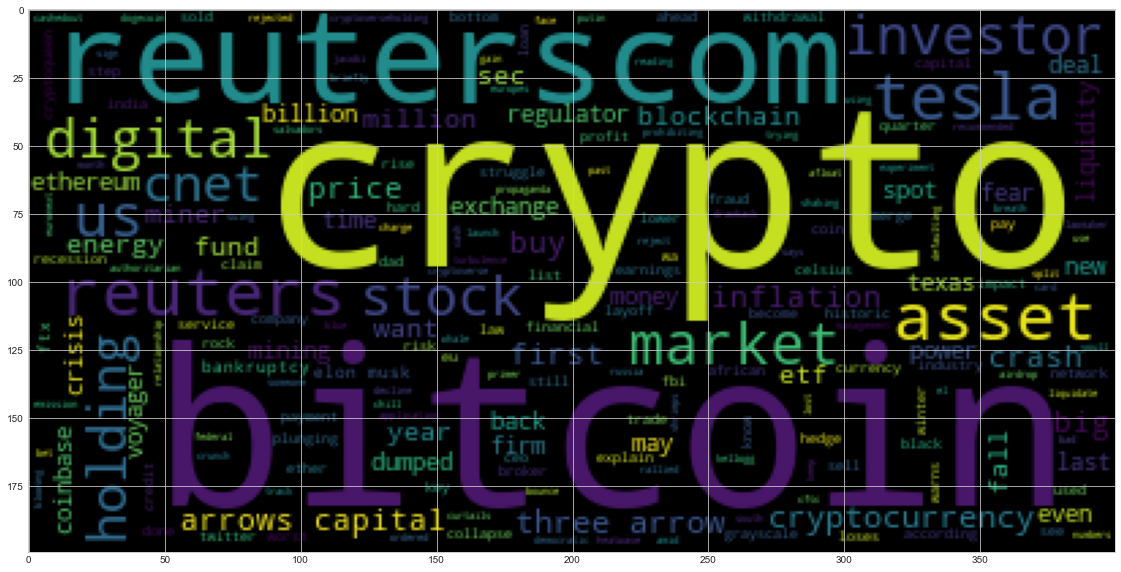

In [27]:
# Generate the Bitcoin word cloud
generate_wc(btc_df)

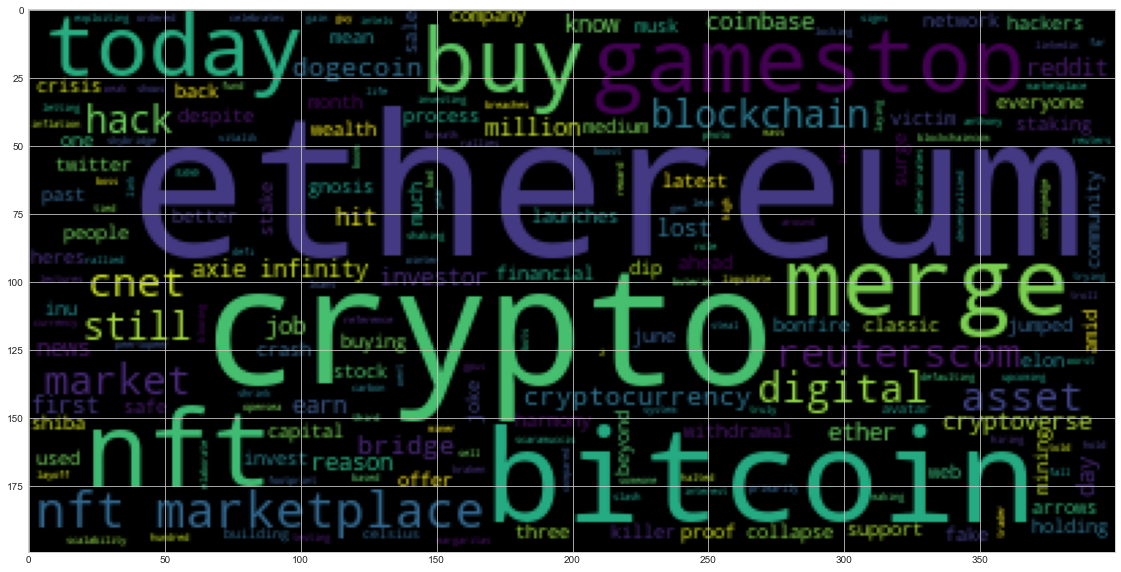

In [28]:
# Generate the Ethereum word cloud
generate_wc(eth_df)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [30]:
import spacy
from spacy import displacy

In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [33]:
# Concatenate all of the Bitcoin text together
doc=' '.join(btc_df['title'])
# Run the NER processor on all of the text
doc=nlp(doc)
# Render the visualization
displacy.render(doc, style='ent')

In [36]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Texas GPE
Bitcoin PERSON
Putin PERSON
Russia GPE
Three CARDINAL
675 MONEY
75% PERCENT
Bitcoin Holdings ORG
Elon Musk PERSON
SEC ORG
ETF PERSON
$936 million MONEY
Bitcoin PERSON
a year DATE
Tesla ORG
winter DATE
El Salvador's GPE
Reuters Bitcoin ORG
Tesla ORG
75% PERCENT
Reuters ORG
The Week DATE
Numbers ORG
Kellogg ORG
SEC ORG
Grayscale ORG
19000 MONEY
Jacobi Asset Management ORG
Europe LOC
first ORDINAL
Democratic NORP
The Relationship between Bitcoin and Inflation How WORK_OF_ART
50% PERCENT
the last month DATE
Ethereum 2.0 Someone Lost Millions Trying ORG
$2K MONEY
CNET ORG
U.S. GPE
CFTC ORG
South African NORP
1.7 MONEY
Brazil GPE
Mercado Bitcoin PERSON
Mexico GPE
this year DATE
Texas GPE
EU ORG
Reuters School Recovers Ransomware Paid ORG
an additional 27% PERCENT
2019 DATE
Fairlead ORG
Katie Stockton Bitso's PERSON
$2 billion MONEY
Latin America Cryptocurrency LOC
79% PERCENT
U.S. SEC NORP
ARK ORG
4 CARDINAL
above $1 trillion MONEY
Elon Musk PERSON
75% PERCENT
Tesla ORG
last quarte

---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
doc1=' '.join(eth_df['title'])
# Run the NER processor on all of the text
doc1=nlp(doc1)
# Render the visualization
displacy.render(doc1, style='ent')

In [37]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Texas GPE
Bitcoin PERSON
Putin PERSON
Russia GPE
Three CARDINAL
675 MONEY
75% PERCENT
Bitcoin Holdings ORG
Elon Musk PERSON
SEC ORG
ETF PERSON
$936 million MONEY
Bitcoin PERSON
a year DATE
Tesla ORG
winter DATE
El Salvador's GPE
Reuters Bitcoin ORG
Tesla ORG
75% PERCENT
Reuters ORG
The Week DATE
Numbers ORG
Kellogg ORG
SEC ORG
Grayscale ORG
19000 MONEY
Jacobi Asset Management ORG
Europe LOC
first ORDINAL
Democratic NORP
The Relationship between Bitcoin and Inflation How WORK_OF_ART
50% PERCENT
the last month DATE
Ethereum 2.0 Someone Lost Millions Trying ORG
$2K MONEY
CNET ORG
U.S. GPE
CFTC ORG
South African NORP
1.7 MONEY
Brazil GPE
Mercado Bitcoin PERSON
Mexico GPE
this year DATE
Texas GPE
EU ORG
Reuters School Recovers Ransomware Paid ORG
an additional 27% PERCENT
2019 DATE
Fairlead ORG
Katie Stockton Bitso's PERSON
$2 billion MONEY
Latin America Cryptocurrency LOC
79% PERCENT
U.S. SEC NORP
ARK ORG
4 CARDINAL
above $1 trillion MONEY
Elon Musk PERSON
75% PERCENT
Tesla ORG
last quarte

---